# JuliaR

### On DataFrames and R (dplyr)-like functionality in Julia

<img src="meme.jpg" alt="Drawing" style="width: 500px;"/>


---

---

---

---

---

## Package management 

### To download

```Pkg.add``` $\equiv$ ```install.packages```

In [93]:
import Pkg # load Pkg package into namespace
Pkg.add("DataFrames") # download package from github

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


#### TASK: Now you do it!

---

### To load 

Either

In [2]:
import DataFrames 

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1260


Adds functions/variables/structs from ```DataFrames``` to namesapces with ```DataFrames.``` prefix.

i.e. 

In [3]:
DataFrames.nrow

nrow (generic function with 2 methods)

calls the ```nrow``` function from ```DataFrames```;

sans prefix, ```nrow``` throws an error.

In [94]:
nrow

nrow (generic function with 2 methods)

or

In [95]:
using DataFrames

Adds exported functions/variables/structs from ```DataFrames``` to namespace.

i.e. ```nrow()``` calls the ```nrow()``` function from ```DataFrames```.

In [97]:
nrow

nrow (generic function with 2 methods)

reminds me of the `attatch()` function in `R` 

---

---

---

---

---

## Getting help

1) type ```?``` then the thing you want help with in the REPL

In [98]:
? + 

search: +



```
+(x, y...)
```

Addition operator. `x+y+z+...` calls this function with all arguments, i.e. `+(x, y, z, ...)`.

# Examples

```jldoctest
julia> 1 + 20 + 4
25

julia> +(1, 20, 4)
25
```

---

```
dt::Date + t::Time -> DateTime
```

The addition of a `Date` with a `Time` produces a `DateTime`. The hour, minute, second, and millisecond parts of the `Time` are used along with the year, month, and day of the `Date` to create the new `DateTime`. Non-zero microseconds or nanoseconds in the `Time` type will result in an `InexactError` being thrown.


2) Google it. 

3) Post in the slack

---

---

---

---

---

## Functions (very quickly)

Most similar to `R` is 

In [166]:
head = function(x,y)
    return first(df,4) # first is a function from DataFrames
end 

ErrorException: invalid redefinition of constant head

most similar to MATLAB

In [100]:
f1 = function(x,y) 
    x*y
end

ErrorException: invalid redefinition of constant f1

For piping, anonymous functions are neat

In [101]:
f2 = x -> x^2

#32 (generic function with 1 method)

In [102]:
f2(4)

16

see also
 - broadcasting with `.` syntax (maybe the best feature there is! IMO) 
 - methods and mutliple dispatch and types

---

---

---

---

---

## Piping (function compositon)

Pass the object on the left to the function of the right. 

i.e. In R we use the `%>%` infix operator 
```
> aFun <- function(x) x^2
> b <- 2 
> b %>% aFun
[1] 4
```

In julia its `|>`

In [91]:
fun(x) = x^2
b = 2 
b |> fun |> fun 

16

with anonymous functions

In [104]:
b |> 
    x -> x^2 |> 
    x -> 2*x

8

There are some other really cool function composition and piping stuff out there too
 - $f\circ g$ notation type `?\circ\tab` into the REPL
 - or see the `Piping` package

---

---

---

---

---

## Loading data 

In [73]:
import CSV 

Either 

```CSV.read("cars.csv", DataFrame)```

or 

which is equivalent to 

In [113]:
cars = CSV.File("cars.csv") |> DataFrame 
cars |> head 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway
,String,String,String,Float64,Float64,Float64,Int64,Int64
1,Acura,Integra,Small,12.9,15.9,18.8,25,31
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25
3,Audi,90,Compact,25.9,29.1,32.3,20,26
4,Audi,100,Midsize,30.8,37.7,44.6,19,26
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30


There is also a ```DelimitedFiles``` package, but I've never used it. 

---

---

---

---

---

## Basic operations 

The usage of some functionality is *exactly* the same as R;

In [114]:
nrow(cars)

93

In [115]:
ncol(cars)

27

In [116]:
names(cars)

27-element Array{String,1}:
 "Manufacturer"
 "Model"
 "Type"
 "MinPrice"
 "Price"
 "MaxPrice"
 "MPGCity"
 "MPGHighway"
 "AirBags"
 "DriveTrain"
 "Cylinders"
 "EngineSize"
 "Horsepower"
 ⋮
 "ManTransAvail"
 "FuelTankCapacity"
 "Passengers"
 "Length"
 "Wheelbase"
 "Width"
 "TurnCircle"
 "RearSeatRoom"
 "LuggageRoom"
 "Weight"
 "Origin"
 "Make"

---

---

---

---

---

## Indexing ```DataFrames```

There are many options (too many?).

Either 

In [121]:
cars.Type # most similar to income$Sex in R
cars."Type" 

93-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Small"
 "Midsize"
 "Compact"
 "Midsize"
 "Midsize"
 "Midsize"
 "Large"
 "Large"
 "Midsize"
 "Large"
 "Midsize"
 "Compact"
 "Compact"
 ⋮
 "Compact"
 "Small"
 "Small"
 "Sporty"
 "Midsize"
 "Van"
 "Small"
 "Van"
 "Compact"
 "Sporty"
 "Compact"
 "Midsize"

Or index with square brackets
```
cars[rows, columns]
```

To get all rows we use either
```
: # as in MATLAB
```
or
```
! 
```

The columns argument can be any of (all 3 return the same thing)
```
:Type      # the syntax for a Symbol type
"Type"     # string
3          # column number 
```
or as a vector (all 3 return the same thing)
```
[:Type]
["Type"]
[3]
```


#### TASK: What is the difference beetween 

In [129]:
cars[:,[:Type]]
cars[!,[:Type]];

#### what is the difference between 

In [132]:
cars[:,:Type]
cars[:,[:Type]];

#### what does this one do

In [135]:
cars.Type; # or cars."Type" same-same 

---

The following are all ways to index a `DataFrame`. 

In [142]:
## Return a VIEW as a Vector
cars.Type      ## most similar to cars$Type in R
cars."Type"
cars[!,:Type] 
cars[!,"Type"]
cars[!,3]

## Return a COPY as a Vector 
cars[:,:Type] 
cars[:,"Type"]
cars[:,3]

## return a COPY as a DataFrame
cars[:,[:Type]]
cars[:,["Type"]]
cars[:,[3]]

## return a VIEW as a DataFrame
cars[!,[:Type]] # this is my personal preference
cars[!,["Type"]]
cars[!,[3]];

can also index columns via arrays and logicals but better to use `filter` see below 

We can also pass arrays of indicies 

In [153]:
cars[!,[:Type, :Model]] |> head 

,Type,Model
,String,String
1,p,Integra
2,Midsize,Legend
3,Compact,90
4,Midsize,100
5,Midsize,535i


or invert selection with 

In [154]:
cars[!,Not([:Type,:Model])] |> head 

,Manufacturer,MinPrice,Price,MaxPrice,MPGCity,MPGHighway,AirBags
,String,Float64,Float64,Float64,Int64,Int64,String
1,Acura,12.9,15.9,18.8,25,31,None
2,Acura,29.2,33.9,38.7,18,25,Driver & Passenger
3,Audi,25.9,29.1,32.3,20,26,Driver only
4,Audi,30.8,37.7,44.6,19,26,Driver & Passenger
5,BMW,23.7,30.0,36.2,22,30,Driver only


---

#### What is the difference between a *copy* and a *view*

In [161]:
aCopy = cars[:,[:Type]]     # select Type column as a COPY
aCopy[1,:Type] = "hello"    # change the first element
aCopy |> head               # print the copy

,Type
,String
1,hello
2,Midsize
3,Compact
4,Midsize
5,Midsize


In [162]:
cars |> head       # print original and compare 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway
,String,String,String,Float64,Float64,Float64,Int64,Int64
1,Acura,Integra,p,12.9,15.9,18.8,25,31
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25
3,Audi,90,Compact,25.9,29.1,32.3,20,26
4,Audi,100,Midsize,30.8,37.7,44.6,19,26
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30


In [164]:
aView = cars[!,[:Type]]     # select the Type column as a VIEW
aView[1,:Type] = "hello"    # change the first element
aView |> head               # print the view

,Type
,String
1,hello
2,Midsize
3,Compact
4,Midsize
5,Midsize


In [165]:
cars |> head      # now it has changed 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway
,String,String,String,Float64,Float64,Float64,Int64,Int64
1,Acura,Integra,hello,12.9,15.9,18.8,25,31
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25
3,Audi,90,Compact,25.9,29.1,32.3,20,26
4,Audi,100,Midsize,30.8,37.7,44.6,19,26
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30


***```cars``` has how changed!!!!***

Be careful.

---

---

---

---

---

---

## A likeness with ```dplyr```

The ```DataFrames``` package has the same data manipulation functionality as ```dplyr```



``` R ``` functions and their ```julia``` equivalents;

 - In R ```rename()```$\equiv$ in julia ```rename()``` - rename columns.
 
 - In R ```filter()```$\equiv$ in julia ```filter()``` - picks cases based on their values.
 
 - In R ```select()```$\equiv$ in julia ```select()``` - picks variables based on their names.
 
 - In R ```mutate()```$\equiv$ in julia ```transform()``` - adds new variables that are functions of existing variables.

 - In R ```summarise()```$\equiv$ in julia ```combine()``` - reduces multiple values down to a single summary

 - In R ```arrange()```$\equiv$ in julia ```sort()``` - changes the ordering of the rows.
 
 - In R ```group_by()```$\equiv$in julia ```groupby()``` - returns a ```GroupedDataFrame``` object.
 

```rename!(), filter!(), select!(), transform!(), sort!()``` also exist to manipulate DataFrames in-place
 
Here, common syntax is either 
```
:ColumName => :NewName
:ColumName => function => :NewName
:ColumName => function
```

Ex's.



In [242]:
cars = CSV.File("cars.csv") |> DataFrame; # read in the data again 'cause I changed it

In [243]:
filter!(:Origin => (x -> isequal(x,"non-USA")), cars) |> head 
# for some reason this one is backwards to the others!
# also has an optional argument view::Bool to specify whether to return a view or a copy
# also, note the ! to change cars in place 
# see also filter(:Origin => (x -> isequal(x,"non-USA")), cars) |> head 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway
,String,String,String,Float64,Float64,Float64,Int64,Int64
1,Acura,Integra,Small,12.9,15.9,18.8,25,31
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25
3,Audi,90,Compact,25.9,29.1,32.3,20,26
4,Audi,100,Midsize,30.8,37.7,44.6,19,26
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30


In [244]:
select!(cars, [:Manufacturer, :Model, :Price, :MPGCity, :MPGHighway, :DriveTrain, :Cylinders, :EngineSize]) |> names 

8-element Array{String,1}:
 "Manufacturer"
 "Model"
 "Price"
 "MPGCity"
 "MPGHighway"
 "DriveTrain"
 "Cylinders"
 "EngineSize"

In [245]:
mpg2lper100(MPG) = 235.215./MPG
transform!(cars,:MPGCity => mpg2lper100 => :City, :MPGHighway => mpg2lper100 => :Highway) |> 
    x -> select!(x,Not([:MPGCity,:MPGHighway])) |> 
    head 

,Manufacturer,Model,Price,DriveTrain,Cylinders,EngineSize,City,Highway
,String,String,Float64,String,String,Float64,Float64,Float64
1,Acura,Integra,15.9,Front,4,1.8,9.4086,7.58758
2,Acura,Legend,33.9,Front,6,3.2,13.0675,9.4086
3,Audi,90,29.1,Front,6,2.8,11.7607,9.04673
4,Audi,100,37.7,Front,6,2.8,12.3797,9.04673
5,BMW,535i,30.0,Rear,4,3.5,10.6916,7.8405


In [246]:
carsByCylinders = groupby(cars, :Cylinders) 

,Manufacturer,Model,Price,DriveTrain,Cylinders,EngineSize,City,Highway
,String,String,Float64,String,String,Float64,Float64,Float64
1,Acura,Integra,15.9,Front,4,1.8,9.4086,7.58758
2,BMW,535i,30.0,Rear,4,3.5,10.6916,7.8405
3,Geo,Storm,12.5,Front,4,1.6,7.8405,6.53375
4,Honda,Prelude,19.8,Front,4,2.3,9.80063,7.58758
5,Honda,Civic,12.1,Front,4,1.5,5.60036,5.11337
6,Honda,Accord,17.5,Front,4,2.2,9.80063,7.58758
7,Hyundai,Excel,8.0,Front,4,1.5,8.11086,7.12773
8,Hyundai,Elantra,10.0,Front,4,1.8,10.6916,8.11086
9,Hyundai,Scoupe,10.0,Front,4,1.5,9.04673,6.91809


In [247]:
keys(carsByCylinders)

6-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (Cylinders = "4",)
 GroupKey: (Cylinders = "6",)
 GroupKey: (Cylinders = "3",)
 GroupKey: (Cylinders = "8",)
 GroupKey: (Cylinders = "rotary",)
 GroupKey: (Cylinders = "5",)

In [248]:
carsByCylinders[(Cylinders="5",)] |> head 

,Manufacturer,Model,Price,DriveTrain,Cylinders,EngineSize,City,Highway
,String,String,Float64,String,String,Float64,Float64,Float64
1,Volkswagen,Eurovan,19.7,Front,5,2.5,13.8362,11.2007
2,Volvo,850,26.7,Front,5,2.4,11.7607,8.40054


In [249]:
carsByCylinders[6] |> head 

,Manufacturer,Model,Price,DriveTrain,Cylinders,EngineSize,City,Highway
,String,String,Float64,String,String,Float64,Float64,Float64
1,Volkswagen,Eurovan,19.7,Front,5,2.5,13.8362,11.2007
2,Volvo,850,26.7,Front,5,2.4,11.7607,8.40054


In [250]:
carsByCylDrive = groupby(income, [:Cylinders, :DriveTrain])
keys(carsByCylDrive)

12-element DataFrames.GroupKeys{GroupedDataFrame{DataFrame}}:
 GroupKey: (Cylinders = "4", DriveTrain = "Front")
 GroupKey: (Cylinders = "6", DriveTrain = "Front")
 GroupKey: (Cylinders = "4", DriveTrain = "Rear")
 GroupKey: (Cylinders = "6", DriveTrain = "Rear")
 GroupKey: (Cylinders = "8", DriveTrain = "Front")
 GroupKey: (Cylinders = "6", DriveTrain = "4WD")
 GroupKey: (Cylinders = "8", DriveTrain = "Rear")
 GroupKey: (Cylinders = "3", DriveTrain = "Front")
 GroupKey: (Cylinders = "rotary", DriveTrain = "Rear")
 GroupKey: (Cylinders = "4", DriveTrain = "4WD")
 GroupKey: (Cylinders = "3", DriveTrain = "4WD")
 GroupKey: (Cylinders = "5", DriveTrain = "Front")

In [251]:
carsByCylDrive[(Cylinders = "4",DriveTrain = "4WD")] |> head 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGCity,MPGHighway
,String,String,String,Float64,Float64,Float64,Int64,Int64
1,Plymouth,Laser,Sporty,11.4,14.4,17.4,23,30
2,Subaru,Loyale,Small,10.5,10.9,11.3,25,30
3,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30
4,Toyota,Previa,Van,18.9,22.7,26.6,18,22


In [252]:
describe(cars)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Manufacturer,,Acura,,Volvo,18,,String
2,Model,,100,,Tercel,45,,String
3,Price,20.5089,8.0,19.1,61.9,,,Float64
4,DriveTrain,,4WD,,Rear,3,,String
5,Cylinders,,3,,rotary,6,,String
6,EngineSize,2.24222,1.0,2.2,4.5,,,Float64
7,City,10.4738,5.11337,10.6916,13.8362,,,Float64
8,Highway,8.11545,4.7043,7.8405,11.2007,,,Float64


In [254]:
mean(x) = sum(x)/length(x)
combine(carsByCylinders, :City => mean) |> x -> sort(x,:Cylinders)

,Cylinders,City_mean
,String,Float64
1,3,6.09075
2,4,9.62288
3,5,12.7985
4,6,12.7238
5,8,13.8362
6,rotary,13.8362


---

---

---

---

---

## Linear Models 

In [295]:
using GLM

In [296]:
cars = CSV.File("cars.csv") |> DataFrame; # read in the data again 'cause I changed it
filterFun(cyl) = !isequal(cyl,"rotary") # exclude rotary engines
filter!(:Cylinders => filterFun, cars) |> 
    x -> transform!(x,:MPGCity => mpg2lper100 => :City, :MPGHighway => mpg2lper100 => :Highway) |> 
    x -> select!(x, Not([:MPGCity,:MPGHighway])) |> 
    head 

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,AirBags
,String,String,String,Float64,Float64,Float64,String
1,Acura,Integra,Small,12.9,15.9,18.8,None
2,Acura,Legend,Midsize,29.2,33.9,38.7,Driver & Passenger
3,Audi,90,Compact,25.9,29.1,32.3,Driver only
4,Audi,100,Midsize,30.8,37.7,44.6,Driver & Passenger
5,BMW,535i,Midsize,23.7,30.0,36.2,Driver only


In [297]:
transform!(cars, :Cylinders => (x->parse.(Int,x)) => :Cylinders)
lm1 = lm(@formula(City ~ Cylinders + Origin), cars)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

City ~ 1 + Cylinders + Origin

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)       4.42476     0.663763   6.67    <1e-8    3.10587    5.74364
Cylinders         1.34473     0.118469  11.35    <1e-18   1.10933    1.58012
Origin: non-USA  -0.170328    0.307739  -0.55    0.5813  -0.781798   0.441142
─────────────────────────────────────────────────────────────────────────────

In [275]:
lm2 = lm(@formula(City ~ Cylinders + Origin), cars, contrasts = Dict(:Cylinders => DummyCoding()))

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

City ~ 1 + Cylinders + Origin

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)       6.25218     0.785153   7.96    <1e-11   4.69135    7.81301
Cylinders: 4      3.52633     0.765058   4.61    <1e-4    2.00545    5.04722
Cylinders: 5      6.70771     1.15793    5.79    <1e-6    4.40582    9.00961
Cylinders: 6      6.65738     0.788405   8.44    <1e-12   5.09009    8.22468
Cylinders: 8      7.63451     0.908325   8.41    <1e-12   5.82882    9.4402
Origin: non-USA  -0.161429    0.283094  -0.57    0.5700  -0.724202   0.401344
─────────────────────────────────────────────────────────────────────────────

In [280]:
using Plots

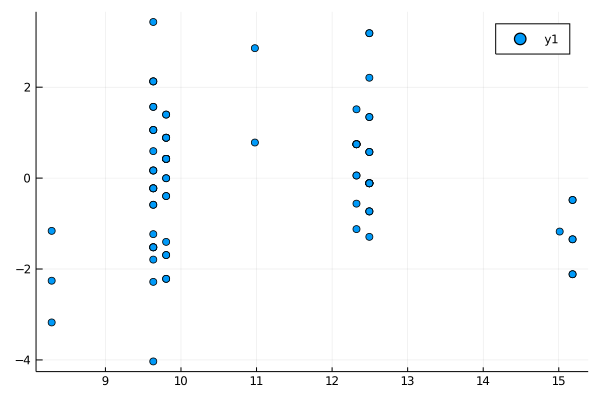

In [279]:
scatter(predict(lm1.model), residuals(lm1.model))

---

## Tasks

1) For the cars dataset return the following as a single dataframe 
 - find the mean efficiency for USA and non-USA cars
 - find the number of USA and non-USA cars in the dataset

2) fit a linear model to determine if paying more for a car gives better milage